# Model Evaluation Exercise

## Regression evaluation

In [ ]:
# NOTE neglegable differences as only 1000 data points - not really enough 

In [1]:
# import numpy
import numpy as np

In [5]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

# # I think We werwe suposed to split out into test train..
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


(1000, 10)
(1000,)


In [6]:
from sklearn.linear_model import LinearRegression, Ridge

In [7]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [8]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

In [9]:
X.shape

(1000, 10)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers too....*
the average of the squared difference between the target value and the value predicted by the regression model. 

It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.
https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914

MSE = 1/n * sum((y_true - y_pred)**2)



* import **mean_absolute_error** from sklearn

In [10]:
from sklearn.metrics import mean_squared_error

* compute MAE

In [11]:
# linear regression y_lr
# ridge regression y_rr
# true y y

MSE_lr = mean_squared_error(y,y_lr) 
MSE_rr = mean_squared_error(y,y_rr) 
print("MSE_lr", MSE_lr)
print("MSE_rr", MSE_rr)

MSE_lr 96.43113800896676
MSE_rr 96.43155456425188


* According to MAE, what is the better model?

In [12]:
# linear regression is ever so slighly better?

____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers too....how much the relationship in data can be explained by model
* It represents the proportion of variance (of y) that has been explained by the independent variables in the model.

R_squared = 1 - (MSE(model)/MSE(baseline))

* import **r2_score** from sklearn

In [13]:
from sklearn.metrics import r2_score

* compute R2

In [14]:
r2_lr = r2_score(y, y_lr)
r2_rr = r2_score(y, y_rr)
print('r2_lr', r2_lr)
print('r2_rr', r2_rr)

r2_lr 0.9977171810154047
r2_rr 0.9977171711542714


* According to R2, what is the better model?

In [15]:
# neither

* (Stretch) use predictions from linear regression and compute adjusted R2

In [16]:
# Adjusted_R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
# Adjusted_R2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R2_lr = 1 - (1-r2_lr)*(len(y)-1)/(len(y)-X.shape[1]-1)
Adjusted_R2_rr = 1 - (1-r2_rr)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(Adjusted_R2_lr)
print(Adjusted_R2_rr)

0.9976940989225372
0.9976940889616958


________________________________
## Classification evaluation

In [17]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [18]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [19]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [20]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

In [21]:
# y_lr

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers too....Precision gives the fraction of correctly identified as positive out of all predicted as positives.

Precision = TP/ (TP + FP)  (True Positive / total predicted as positive)

* import **precision_score** from sklearn

 FROM SKLEARN
* 'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

* 'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

* 'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

* 'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [22]:
from sklearn.metrics import precision_score
# NOTE from sklearn:
# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.


* compute precision

In [23]:
### WHICH AVERAGE SHOULD I BE USING IN THIS CASE?

pre_score_lr = precision_score(y, y_lr, average='micro')
pre_score_rr = precision_score(y, y_rr, average='micro')

* print precision

In [24]:
print('pre_score_lr', pre_score_lr)
print('pre_score_rr', pre_score_rr)

pre_score_lr 0.885
pre_score_rr 0.876


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers to....Sensitivity or True positive rate (want for cancer test - prefer FP to FN(

Recall = TP / (TP + FN)  (true positive / all positive) (TPR - true positive rate)

* import **recal_score** from sklearn

In [25]:
from sklearn.metrics import recall_score

* compute recall

In [26]:
# WHICH AVERERAGE SHOULD BE USED MACRO< MICRO OR weighted
# TRY THEM ALL

recall_lr = recall_score(y, y_lr, average='macro')
recall_rr = recall_score(y, y_rr, average='macro')

recall_lr = recall_score(y, y_lr, average='micro')
recall_rr = recall_score(y, y_rr, average='micro')

recall_lr = recall_score(y, y_lr, average='binary')
recall_rr = recall_score(y, y_rr, average='binary')

* print recall

In [27]:
print('recall_lr', recall_lr)
print('recall_rr', recall_rr)

recall_lr 0.9165009940357853
recall_rr 0.9244532803180915


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers to....plots out the sensitivity and specificity for every possible decision rule cutoff between 0 and 1 for a model.

(my notes) Want the steepest point (low FPR, high TPR)

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


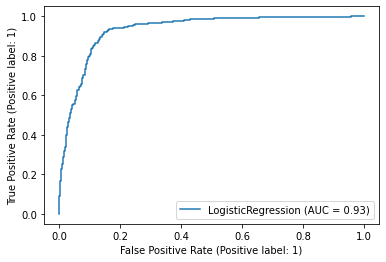

In [28]:
# SUGGESTED READING 
# https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
# plot_roc_curve(clf, X_test, y_test)
plot_roc_curve(lr, X, y)


/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


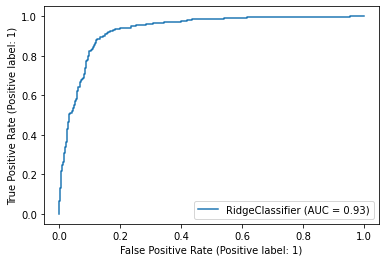

In [30]:
plot_roc_curve(rr, X, y);

* import **roc_curve** from sklearn

In [1]:
from sklearn.metrics import roc_curve, plot_roc_curve

from sklearn.metrics import roc_auc_score
plot_roc_curve(clf, X_test, y_test)

NameError: name 'clf' is not defined

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [48]:
scores = lr.predict_proba(X)
print(scores.shape)

(1000, 2)


In [89]:
# #####THIS DOESN"T WORK AS SCORES SHAPE @ DIMENSIONS WHICH PARAMETER DO I CHOOSE?  # one is y and other is the parameter
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

# # compute AUC-score
# auc = roc_auc_score(y_true,y_proba)

# # print AUC-score
# print(auc)

ValueError: y should be a 1d array, got an array of shape (1000, 2) instead.

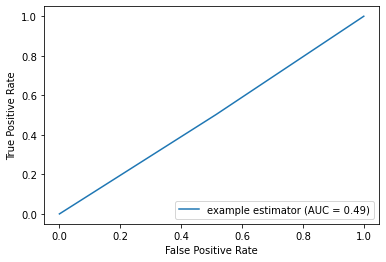

In [86]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, y_lr)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()

plt.show()

* import matplotlib 

In [ ]:
import matplotlib.pyplot as plt

* plot ROC

In [84]:
plot_roc_curve(clf, X_test, y_test) 
plt.show()


NameError: name 'clf' is not defined

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

* used in multinomial logistic regression and neural networks
* aka logistic loss or cross-entropy loss



* import **log_loss** from sklearn

In [42]:
from sklearn.metrics import log_loss

* compute log_loss

In [43]:
log_loss = (y, y_lr)

* print log_loss

In [82]:
# print(log_loss)
# true label  vs predicted

#### Q: According to metrics above, which one is the better model?